Perform a non-linear regression to predict China’s GDP from 1960 to 2014 from given features. Evaluate the quality of the model by computing relevant performance metrics, including the R² value. Generate and display a plot that compares the actual values to the predicted values (Actual vs Predicted) for both tasks.


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit

In [3]:
data = pd.read_csv('china_gdp.csv')
x = data['Year'].values
y = data['Value'].values

def logistic(x, a, b, c):
    return a / (1 + np.exp(-b * (x - c)))

popt, _ = curve_fit(logistic, x, y, p0=[max(y), 0.03, 2000])

y_pred = logistic(x, *popt)

r2 = r2_score(y, y_pred)
print(f"R-squared (R2): {r2:.4f}")



R-squared (R2): 0.9938


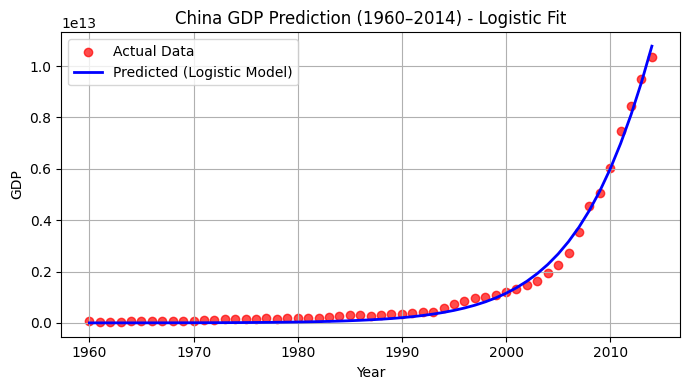

In [4]:
plt.figure(figsize=(7, 4))
plt.scatter(x, y, label='Actual Data', color='red', alpha=0.7)
plt.plot(x, y_pred, label='Predicted (Logistic Model)', color='blue', linewidth=2)
plt.title("China GDP Prediction (1960–2014) - Logistic Fit")
plt.xlabel("Year")
plt.ylabel("GDP")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()